In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [3]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,0%,f,t,Entire villa,Entire home/apt,f,2.0,1.0,1093.1,5.00
1,100%,t,t,Entire home,Entire home/apt,f,2.9,1.0,1511.6,4.70
2,71%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,2029.0,4.75
3,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,1140.0,4.96
4,100%,t,t,Entire loft,Entire home/apt,f,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...
26577,100%,t,t,Private room in guesthouse,Private room,t,4.0,1.0,488.0,5.00
26578,100%,f,t,Room in hotel,Private room,t,2.0,1.0,1093.1,5.00
26579,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2700.0,5.00
26580,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2600.0,5.00


In [4]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\MaFer\AppData\Local\Temp\ipykernel_28156\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_28156\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_28156\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]
#f3 = Private room
f3= f1[(f1["room_type"] == 2)]
#f4 = Shared room
f4= f1[(f1["room_type"] == 3)]
#f5 = Hotel room
f5= f1[(f1["room_type"] == 4)]

<Axes: xlabel='room_type', ylabel='price'>

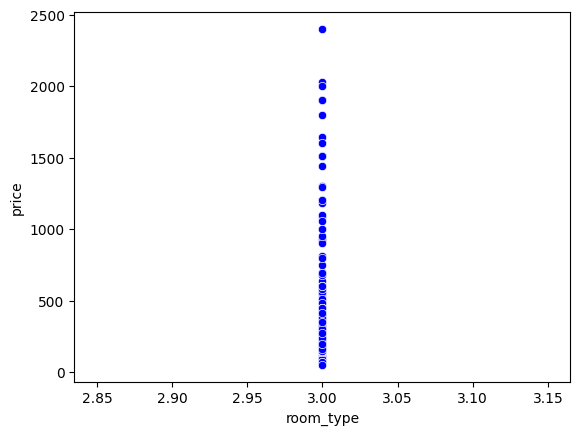

In [6]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='room_type',y='price', color="blue", data=f4)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_response_rate', ylabel='price'>

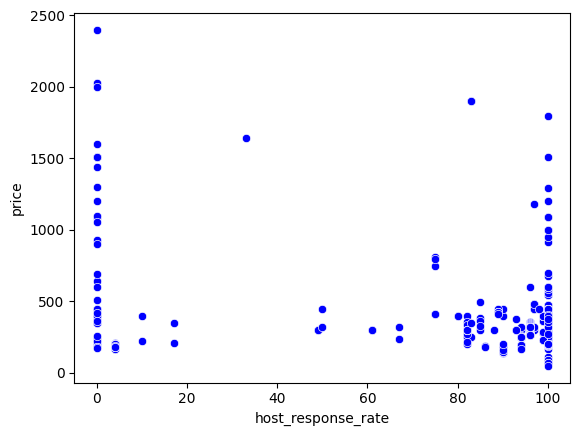

In [7]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_response_rate',y='price', color="blue", data=f4)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

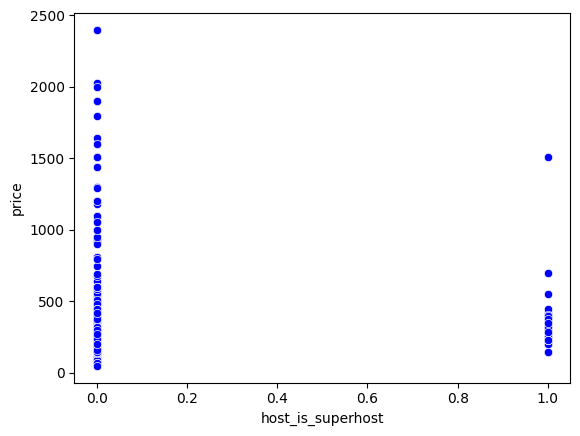

In [8]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_is_superhost',y='price', color="blue", data=f4)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

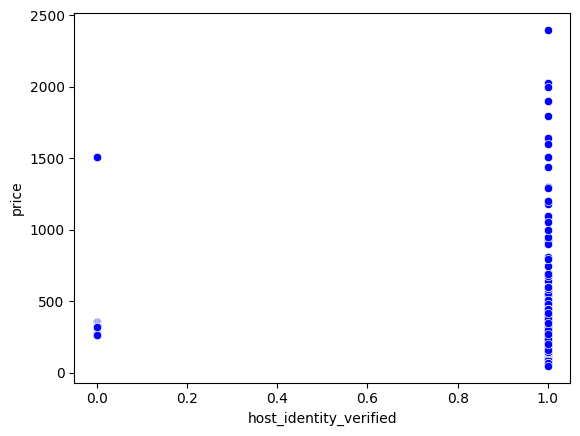

In [9]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_identity_verified',y='price', color="blue", data=f4)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

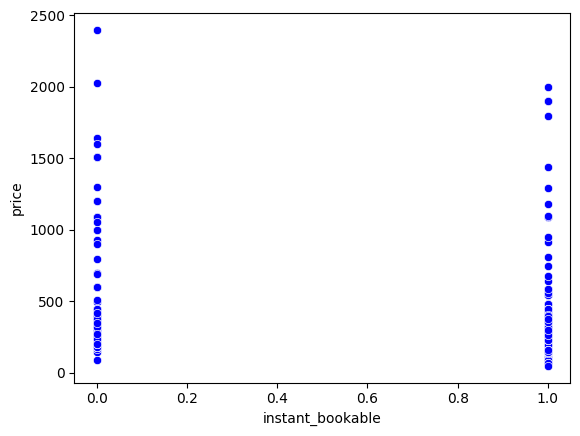

In [10]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='instant_bookable',y='price', color="blue", data=f4)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

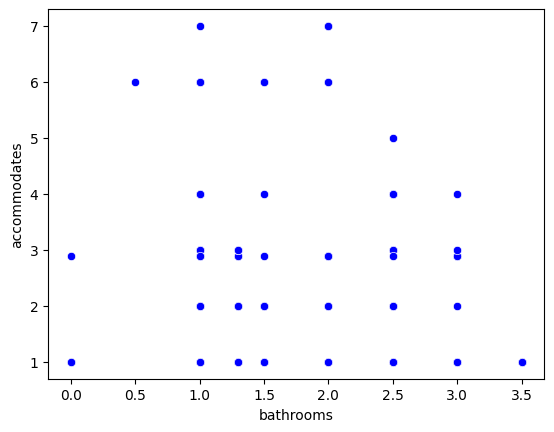

In [11]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='bathrooms',y='accommodates', color="blue", data=f4)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

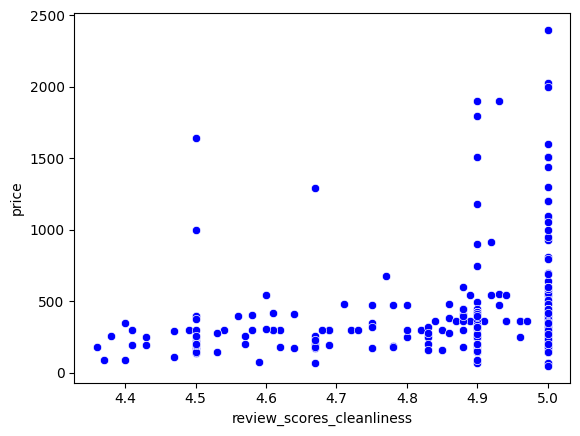

In [12]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='review_scores_cleanliness',y='price', color="blue", data=f4)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)


In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= f4 [['room_type']]
Vars_Dep= f4 ['price']

In [14]:
Vars_Indep2= f4 [['host_response_rate']]
Vars_Dep2= f4 ['price']

In [15]:
Vars_Indep3= f4 [['host_is_superhost']]
Vars_Dep3= f4 ['price']

In [16]:
Vars_Indep4= f4 [['host_identity_verified']]
Vars_Dep4= f4 ['price']

In [17]:
Vars_Indep5= f4 [['instant_bookable']]
Vars_Dep5= f4 ['price']

In [18]:
Vars_Indep6= f4 [['bathrooms']]
Vars_Dep6= f4 ['accommodates']

In [19]:
Vars_Indep7= f4 [['review_scores_cleanliness']]
Vars_Dep7= f4 ['price']

In [20]:
Vars_Indep8= f4 [['property_type']]
Vars_Dep8= f4 ['price']

In [21]:
#Se definie model (para room_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
#Se definie model (para host_response_rate) como función regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [23]:
#Se definie model (para host_is_superhost) como función regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [24]:
#Se definie model (para host_identity_verified) como función regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [25]:
#Se definie model (para instant_bookable) como función regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [26]:
#Se definie model (para bathrooms) como función regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [27]:
#Se definie model (para review_scores_cleanliness) como función regresión lineal
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [28]:
#Se definie model (para property_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [29]:
#Verficamos la función relacionada al modela
type(model)

sklearn.linear_model._base.LinearRegression

In [30]:
#Verficamos la función relacionada al modela
type(model2)

sklearn.linear_model._base.LinearRegression

In [31]:
#Verficamos la función relacionada al modela
type(model3)

sklearn.linear_model._base.LinearRegression

In [32]:
#Verficamos la función relacionada al modela
type(model4)

sklearn.linear_model._base.LinearRegression

In [33]:
#Verficamos la función relacionada al modela
type(model5)

sklearn.linear_model._base.LinearRegression

In [34]:
#Verficamos la función relacionada al modela
type(model6)

sklearn.linear_model._base.LinearRegression

In [35]:
#Verficamos la función relacionada al modela
type(model7)

sklearn.linear_model._base.LinearRegression

In [36]:
#Verficamos la función relacionada al modela
type(model8)

sklearn.linear_model._base.LinearRegression

In [37]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [38]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [39]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [40]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Vars_Dep4)

LinearRegression()

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [42]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model7.fit(X=Vars_Indep7, y=Vars_Dep7)

LinearRegression()

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model8.fit(X=Vars_Indep8, y=Vars_Dep8)

LinearRegression()

In [45]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(457.5416458852868)}

In [46]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.23856494]),
 'rank_': 1,
 'singular_': array([869.85112666]),
 'intercept_': np.float64(667.3618882925116)}

In [47]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-124.56462465]),
 'rank_': 1,
 'singular_': array([6.50033569]),
 'intercept_': np.float64(472.45212464589235)}

In [48]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-279.00123773]),
 'rank_': 1,
 'singular_': array([7.64388172]),
 'intercept_': np.float64(687.1436619718311)}

In [49]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-147.77530611]),
 'rank_': 1,
 'singular_': array([9.98977033]),
 'intercept_': np.float64(536.4042780748664)}

In [50]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.12641194]),
 'rank_': 1,
 'singular_': array([14.76805037]),
 'intercept_': np.float64(1.4226397847974679)}

In [51]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([518.18564934]),
 'rank_': 1,
 'singular_': array([3.29243764]),
 'intercept_': np.float64(-2080.8573074125675)}

In [52]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7.12823224]),
 'rank_': 1,
 'singular_': array([65.40299016]),
 'intercept_': np.float64(-107.98847978601884)}

Modelo matemático: y= 0.0 + 125.132 <- Este caso especiífico es de room_type

In [53]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred= model.predict(X=f4[['room_type']])
y_pred

array([457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54

In [54]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred2= model2.predict(X=f4[['host_response_rate']])
y_pred2

array([667.36188829, 667.36188829, 343.50539405, 343.50539405,
       343.50539405, 667.36188829, 343.50539405, 667.36188829,
       343.50539405, 634.97623887, 343.50539405, 667.36188829,
       401.79956301, 401.79956301, 667.36188829, 667.36188829,
       667.36188829, 667.36188829, 667.36188829, 667.36188829,
       356.45965382, 667.36188829, 424.46951761, 667.36188829,
       667.36188829, 667.36188829, 667.36188829, 424.46951761,
       667.36188829, 362.9367837 , 362.9367837 , 362.9367837 ,
       362.9367837 , 362.9367837 , 343.50539405, 505.43364117,
       362.9367837 , 353.22108887, 343.50539405, 362.9367837 ,
       362.9367837 , 362.9367837 , 362.9367837 , 362.9367837 ,
       667.36188829, 667.36188829, 667.36188829, 667.36188829,
       667.36188829, 667.36188829, 343.50539405, 343.50539405,
       343.50539405, 343.50539405, 667.36188829, 343.50539405,
       667.36188829, 343.50539405, 392.08386818, 392.08386818,
       392.08386818, 667.36188829, 667.36188829, 398.56

In [55]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred3= model3.predict(X=f4[['host_is_superhost']])
y_pred3

array([472.45212465, 472.45212465, 347.8875    , 472.45212465,
       347.8875    , 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45

In [56]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred4= model4.predict(X=f4[['host_identity_verified']])
y_pred4

array([687.14366197, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 687.14366197,
       408.14242424, 408.14242424, 687.14366197, 687.14366197,
       408.14242424, 687.14366197, 687.14366197, 687.14366197,
       408.14242424, 687.14366197, 408.14242424, 408.14242424,
       687.14366197, 408.14242424, 687.14366197, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       687.14366197, 687.14366197, 687.14366197, 687.14366197,
       687.14366197, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       687.14366197, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 687.14366197, 408.14

In [57]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred5= model5.predict(X=f4[['instant_bookable']])
y_pred5

array([536.40427807, 388.62897196, 536.40427807, 536.40427807,
       388.62897196, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 388.62897196, 388.62897196, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 388.62897196, 388.62897196, 388.62897196,
       388.62897196, 388.62897196, 388.62897196, 536.40427807,
       388.62897196, 388.62897196, 388.62897196, 388.62897196,
       388.62897196, 388.62897196, 388.62897196, 388.62897196,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 388.62897196, 388.62897196,
       536.40427807, 388.62897196, 536.40427807, 388.62897196,
       536.40427807, 388.62897196, 388.62897196, 388.62897196,
       388.62897196, 536.40427807, 536.40427807, 388.62

In [58]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred6= model6.predict(X=f4[['bathrooms']])
y_pred6

array([1.54905172, 1.61225769, 1.5869753 , 1.5869753 , 1.80187559,
       1.54905172, 1.5869753 , 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.61225769, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.61225769,
       1.61225769, 1.54905172, 1.61225769, 1.61225769, 1.54905172,
       1.54905172, 1.61225769, 1.61225769, 1.61225769, 1.61225769,
       1.54905172, 1.61225769, 1.54905172, 1.61225769, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.67546365, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.42263978, 1.73866962,
       1.54905172, 1.73866962, 1.80187559, 1.54905172, 1.5869753 ,
       1.5869753 , 1.5869753 , 1.5869753 , 1.5869753 , 1.58697

In [59]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred7= model7.predict(X=f4[['review_scores_cleanliness']])
y_pred7

array([510.07093927, 510.07093927, 235.43254512, 510.07093927,
       473.79794381, 510.07093927, 271.70554057, 510.07093927,
       510.07093927, 250.9781146 , 468.61608732, 510.07093927,
       406.4338094 , 458.25237433, 510.07093927, 510.07093927,
       510.07093927, 510.07093927, 510.07093927, 510.07093927,
       447.88866135, 510.07093927, 447.88866135, 510.07093927,
       510.07093927, 510.07093927, 510.07093927, 323.5241055 ,
       510.07093927, 458.25237433, 458.25237433, 245.7962581 ,
       458.25237433, 458.25237433, 458.25237433, 510.07093927,
       214.70511914, 416.79752239, 390.88823992, 204.34140616,
       339.06967498, 349.43338797, 421.97937888, 458.25237433,
       510.07093927, 458.25237433, 510.07093927, 510.07093927,
       510.07093927, 510.07093927, 458.25237433, 297.61482304,
       183.61398018, 339.06967498, 510.07093927, 458.25237433,
       510.07093927, 235.43254512, 204.34140616, 437.52494836,
       458.25237433, 510.07093927, 510.07093927, 473.79

In [60]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred8= model8.predict(X=f4[['property_type']])
y_pred8

array([483.6547959 , 476.52656366, 448.01363472, 462.27009919,
       455.14186695, 483.6547959 , 462.27009919, 483.6547959 ,
       462.27009919, 455.14186695, 455.14186695, 483.6547959 ,
       440.88540248, 455.14186695, 455.14186695, 483.6547959 ,
       483.6547959 , 455.14186695, 483.6547959 , 483.6547959 ,
       483.6547959 , 440.88540248, 483.6547959 , 455.14186695,
       426.628938  , 440.88540248, 455.14186695, 483.6547959 ,
       483.6547959 , 462.27009919, 462.27009919, 462.27009919,
       462.27009919, 462.27009919, 483.6547959 , 419.50070577,
       462.27009919, 483.6547959 , 455.14186695, 462.27009919,
       462.27009919, 462.27009919, 462.27009919, 462.27009919,
       455.14186695, 483.6547959 , 455.14186695, 455.14186695,
       455.14186695, 483.6547959 , 483.6547959 , 483.6547959 ,
       483.6547959 , 483.6547959 , 455.14186695, 483.6547959 ,
       455.14186695, 483.6547959 , 469.39833143, 469.39833143,
       469.39833143, 483.6547959 , 455.14186695, 462.27

In [61]:
# Crear una copia de f4 antes de modificarlo
f4_copy = f4.copy()

In [62]:
#Insertamos la columna de predicciones en el Dataframe
f4.insert(0, 'Pred_room', y_pred)
f4

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,457.541646,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,457.541646,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,457.541646,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,457.541646,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,457.541646,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...
26261,457.541646,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,457.541646,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,457.541646,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,457.541646,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [63]:
# Insertamos las columnas de predicciones en la copia
f4_copy.insert(0, 'Pred_response', y_pred2)
f4_copy.insert(0, 'Pred_superhost', y_pred3)
f4_copy.insert(0, 'Pred_identity', y_pred4)
f4_copy.insert(0, 'Pred_bookable', y_pred5)
f4_copy.insert(0, 'Pred_bathrooms', y_pred6)
f4_copy.insert(0, 'Pred_cleanliness', y_pred7)
f4_copy.insert(0, 'Pred_property', y_pred8)

<Axes: xlabel='room_type', ylabel='price'>

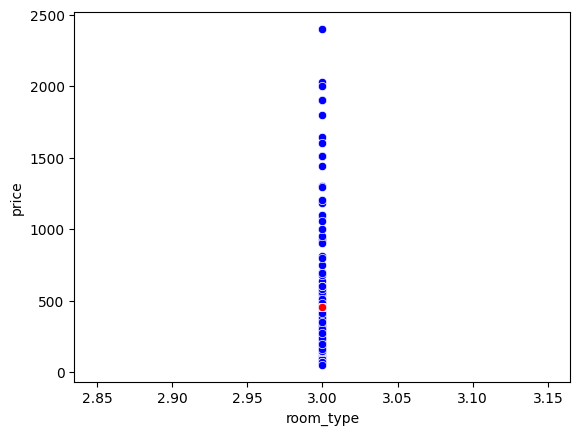

In [64]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='room_type', y='price', color="blue", data = f4)
sns.scatterplot(x='room_type', y='Pred_room', color="red", data = f4)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_response_rate', ylabel='price'>

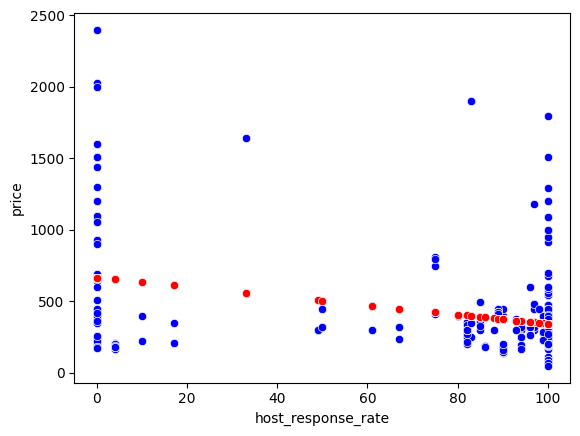

In [65]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_response_rate', y='price', color="blue", data = f4_copy)
sns.scatterplot(x='host_response_rate', y='Pred_response', color="red", data = f4_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

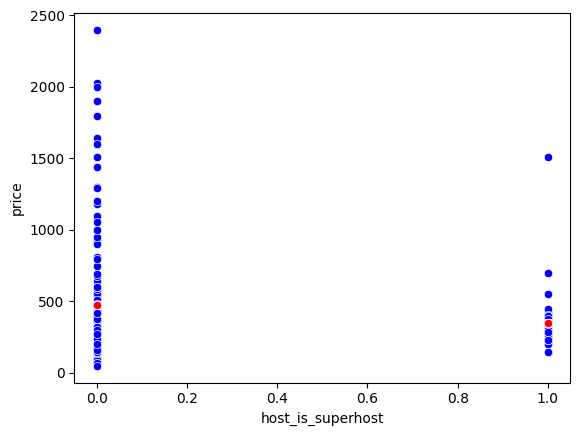

In [66]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data = f4_copy)
sns.scatterplot(x='host_is_superhost', y='Pred_superhost', color="red", data = f4_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

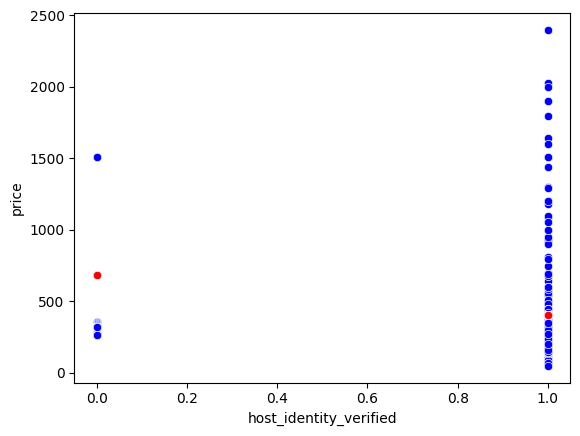

In [67]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data = f4_copy)
sns.scatterplot(x='host_identity_verified', y='Pred_identity', color="red", data = f4_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='instant_bookable', ylabel='price'>

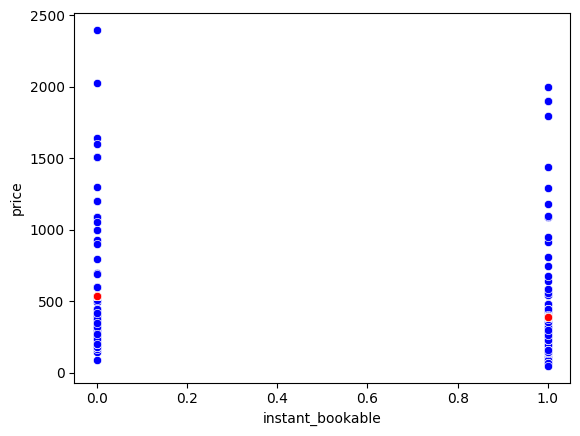

In [68]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data = f4_copy)
sns.scatterplot(x='instant_bookable', y='Pred_bookable', color="red", data = f4_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

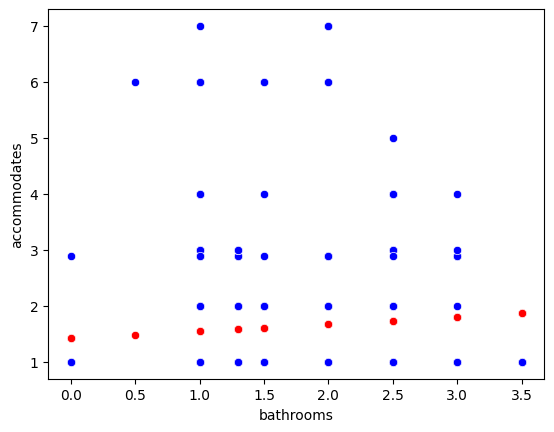

In [69]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data = f4_copy)
sns.scatterplot(x='bathrooms', y='Pred_bathrooms', color="red", data = f4_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

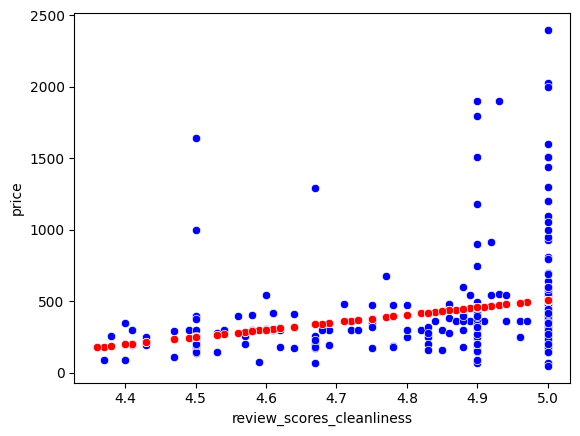

In [70]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data = f4_copy)
sns.scatterplot(x='review_scores_cleanliness', y='Pred_cleanliness', color="red", data = f4_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='property_type', ylabel='price'>

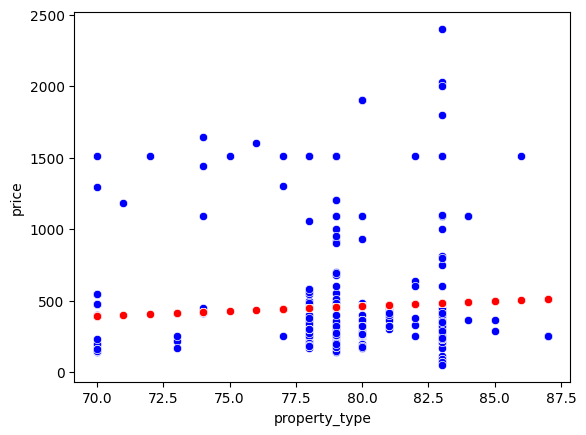

In [71]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='property_type', y='price', color="blue", data = f4_copy)
sns.scatterplot(x='property_type', y='Pred_property', color="red", data = f4_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0

In [73]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.11238812500386286

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.00928509522499088

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Vars_Indep4, y=Vars_Dep4)
coef_Deter4

0.06441181255444517

In [76]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.030863138455546668

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.006296681287526473

In [78]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Vars_Indep7, y=Vars_Dep7)
coef_Deter7

0.04122220553622713

In [79]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Vars_Indep8, y=Vars_Dep8)
coef_Deter8

0.0030781106977749717

In [80]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [81]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.33524338174505824)

In [82]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.09635919896403705)

In [83]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.25379482373453793)

In [84]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.17567907802452365)

In [85]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.07935163065448922)

In [86]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.20303252334595837)

In [87]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.05548072365943844)

In [88]:
#Graficamos todas las despersiones entre todas las variables
#sns.pairplot(f2)

In [89]:
#Analizar categorias de una columna
df6 = f4.groupby(['room_type'])['room_type'].count()
df6

room_type
3    401
Name: room_type, dtype: int64

In [90]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=f4.corr()
Corr_Factors

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.286184,-0.001211,-0.047290,NaN,0.569687,-0.025685,-0.077524,-0.335243,-0.231429
host_is_superhost,NaN,0.286184,1.000000,0.171043,0.145458,NaN,0.067512,-0.071444,-0.112288,-0.096359,-0.106260
host_identity_verified,NaN,-0.001211,0.171043,1.000000,-0.088206,NaN,-0.132394,0.082419,0.241660,-0.253795,-0.230356
property_type,NaN,-0.047290,0.145458,-0.088206,1.000000,NaN,-0.018435,-0.134674,-0.265133,0.055481,-0.029326
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.569687,0.067512,-0.132394,-0.018435,NaN,1.000000,-0.082470,-0.091362,-0.175679,-0.175931
accommodates,NaN,-0.025685,-0.071444,0.082419,-0.134674,NaN,-0.082470,1.000000,0.079352,0.281064,-0.021192
bathrooms,NaN,-0.077524,-0.112288,0.241660,-0.265133,NaN,-0.091362,0.079352,1.000000,-0.277662,-0.024730
price,NaN,-0.335243,-0.096359,-0.253795,0.055481,NaN,-0.175679,0.281064,-0.277662,1.000000,0.203033


In [91]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=f4.corr()
Corr_Factors

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.286184,-0.001211,-0.047290,NaN,0.569687,-0.025685,-0.077524,-0.335243,-0.231429
host_is_superhost,NaN,0.286184,1.000000,0.171043,0.145458,NaN,0.067512,-0.071444,-0.112288,-0.096359,-0.106260
host_identity_verified,NaN,-0.001211,0.171043,1.000000,-0.088206,NaN,-0.132394,0.082419,0.241660,-0.253795,-0.230356
property_type,NaN,-0.047290,0.145458,-0.088206,1.000000,NaN,-0.018435,-0.134674,-0.265133,0.055481,-0.029326
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.569687,0.067512,-0.132394,-0.018435,NaN,1.000000,-0.082470,-0.091362,-0.175679,-0.175931
accommodates,NaN,-0.025685,-0.071444,0.082419,-0.134674,NaN,-0.082470,1.000000,0.079352,0.281064,-0.021192
bathrooms,NaN,-0.077524,-0.112288,0.241660,-0.265133,NaN,-0.091362,0.079352,1.000000,-0.277662,-0.024730
price,NaN,-0.335243,-0.096359,-0.253795,0.055481,NaN,-0.175679,0.281064,-0.277662,1.000000,0.203033


In [92]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors_pred=f4_copy.corr()
Corr_Factors_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,-0.029326,-0.265133,0.018435,0.088206,-0.145458,0.047290,-0.047290,0.145458,-0.088206,1.000000,NaN,-0.018435,-0.134674,-0.265133,0.055481,-0.029326
Pred_cleanliness,-0.029326,1.000000,-0.024730,0.175931,0.230356,0.106260,0.231429,-0.231429,-0.106260,-0.230356,-0.029326,NaN,-0.175931,-0.021192,-0.024730,0.203033,1.000000
Pred_bathrooms,-0.265133,-0.024730,1.000000,0.091362,-0.241660,0.112288,0.077524,-0.077524,-0.112288,0.241660,-0.265133,NaN,-0.091362,0.079352,1.000000,-0.277662,-0.024730
Pred_bookable,0.018435,0.175931,0.091362,1.000000,-0.132394,0.067512,0.569687,-0.569687,-0.067512,0.132394,0.018435,NaN,-1.000000,0.082470,0.091362,0.175679,0.175931
Pred_identity,0.088206,0.230356,-0.241660,-0.132394,1.000000,0.171043,-0.001211,0.001211,-0.171043,-1.000000,0.088206,NaN,0.132394,-0.082419,-0.241660,0.253795,0.230356
Pred_superhost,-0.145458,0.106260,0.112288,0.067512,0.171043,1.000000,0.286184,-0.286184,-1.000000,-0.171043,-0.145458,NaN,-0.067512,0.071444,0.112288,0.096359,0.106260
Pred_response,0.047290,0.231429,0.077524,0.569687,-0.001211,0.286184,1.000000,-1.000000,-0.286184,0.001211,0.047290,NaN,-0.569687,0.025685,0.077524,0.335243,0.231429
host_response_rate,-0.047290,-0.231429,-0.077524,-0.569687,0.001211,-0.286184,-1.000000,1.000000,0.286184,-0.001211,-0.047290,NaN,0.569687,-0.025685,-0.077524,-0.335243,-0.231429
host_is_superhost,0.145458,-0.106260,-0.112288,-0.067512,-0.171043,-1.000000,-0.286184,0.286184,1.000000,0.171043,0.145458,NaN,0.067512,-0.071444,-0.112288,-0.096359,-0.106260
host_identity_verified,-0.088206,-0.230356,0.241660,0.132394,-1.000000,-0.171043,0.001211,-0.001211,0.171043,1.000000,-0.088206,NaN,-0.132394,0.082419,0.241660,-0.253795,-0.230356


In [93]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.286184,0.001211,0.047290,NaN,0.569687,0.025685,0.077524,0.335243,0.231429
host_is_superhost,NaN,0.286184,1.000000,0.171043,0.145458,NaN,0.067512,0.071444,0.112288,0.096359,0.106260
host_identity_verified,NaN,0.001211,0.171043,1.000000,0.088206,NaN,0.132394,0.082419,0.241660,0.253795,0.230356
property_type,NaN,0.047290,0.145458,0.088206,1.000000,NaN,0.018435,0.134674,0.265133,0.055481,0.029326
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.569687,0.067512,0.132394,0.018435,NaN,1.000000,0.082470,0.091362,0.175679,0.175931
accommodates,NaN,0.025685,0.071444,0.082419,0.134674,NaN,0.082470,1.000000,0.079352,0.281064,0.021192
bathrooms,NaN,0.077524,0.112288,0.241660,0.265133,NaN,0.091362,0.079352,1.000000,0.277662,0.024730
price,NaN,0.335243,0.096359,0.253795,0.055481,NaN,0.175679,0.281064,0.277662,1.000000,0.203033


In [94]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1_pred=abs(Corr_Factors_pred)
Corr_Factors1_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.029326,0.265133,0.018435,0.088206,0.145458,0.047290,0.047290,0.145458,0.088206,1.000000,NaN,0.018435,0.134674,0.265133,0.055481,0.029326
Pred_cleanliness,0.029326,1.000000,0.024730,0.175931,0.230356,0.106260,0.231429,0.231429,0.106260,0.230356,0.029326,NaN,0.175931,0.021192,0.024730,0.203033,1.000000
Pred_bathrooms,0.265133,0.024730,1.000000,0.091362,0.241660,0.112288,0.077524,0.077524,0.112288,0.241660,0.265133,NaN,0.091362,0.079352,1.000000,0.277662,0.024730
Pred_bookable,0.018435,0.175931,0.091362,1.000000,0.132394,0.067512,0.569687,0.569687,0.067512,0.132394,0.018435,NaN,1.000000,0.082470,0.091362,0.175679,0.175931
Pred_identity,0.088206,0.230356,0.241660,0.132394,1.000000,0.171043,0.001211,0.001211,0.171043,1.000000,0.088206,NaN,0.132394,0.082419,0.241660,0.253795,0.230356
Pred_superhost,0.145458,0.106260,0.112288,0.067512,0.171043,1.000000,0.286184,0.286184,1.000000,0.171043,0.145458,NaN,0.067512,0.071444,0.112288,0.096359,0.106260
Pred_response,0.047290,0.231429,0.077524,0.569687,0.001211,0.286184,1.000000,1.000000,0.286184,0.001211,0.047290,NaN,0.569687,0.025685,0.077524,0.335243,0.231429
host_response_rate,0.047290,0.231429,0.077524,0.569687,0.001211,0.286184,1.000000,1.000000,0.286184,0.001211,0.047290,NaN,0.569687,0.025685,0.077524,0.335243,0.231429
host_is_superhost,0.145458,0.106260,0.112288,0.067512,0.171043,1.000000,0.286184,0.286184,1.000000,0.171043,0.145458,NaN,0.067512,0.071444,0.112288,0.096359,0.106260
host_identity_verified,0.088206,0.230356,0.241660,0.132394,1.000000,0.171043,0.001211,0.001211,0.171043,1.000000,0.088206,NaN,0.132394,0.082419,0.241660,0.253795,0.230356


<Axes: >

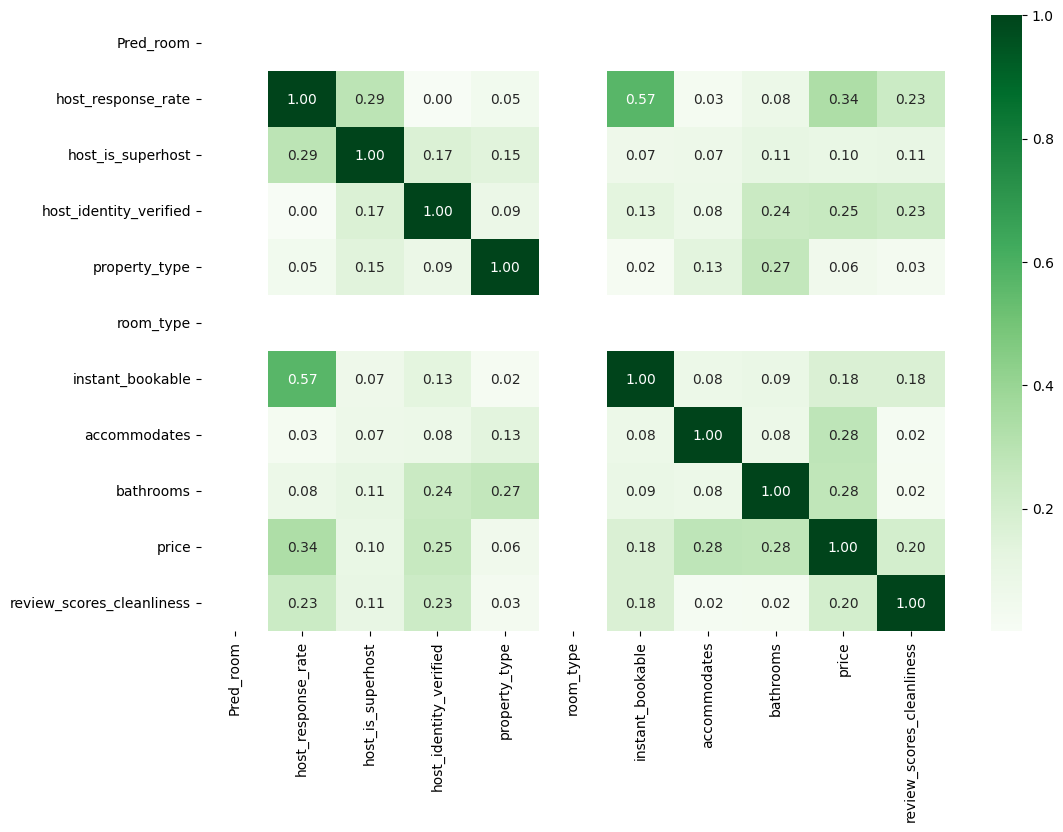

In [95]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Greens', annot=True, fmt=".2f")
Heart_Nap

<Axes: >

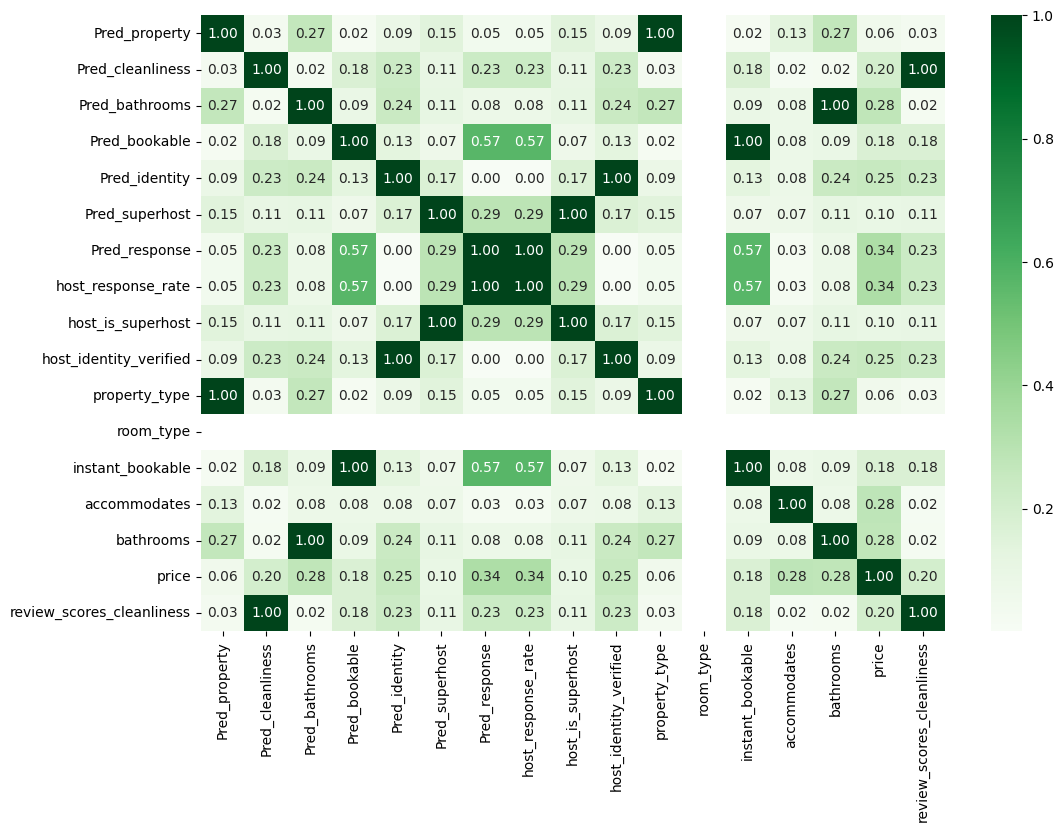

In [96]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1_pred, cmap= 'Greens', annot=True, fmt=".2f")
Heart_Nap